# EP4210 Computational Physics
Class on 16 & 17 Jan 2025

## Numerical Integration
### Reimann Sum Method
Fundamental theorem of calculus:
$$\int_{x=a}^{x=b} f(x)\ dx = F(b)-F(a)$$
where $F(x)$ is antiderivative of $f(x)$. In the 1-D case we may use the **Reimann Sum**:
$$\int_{x=a}^{x=b} f(x)\ dx = \lim_{h \to 0} \sum_{i=0}^{N-1} f(x_i)\ h$$
and the interval $[a,b]$ is divided into $N$ equal subintervals of width $h = \frac{(b-a)} N$


Realistically, we can take some very small value of $h$ and take the Reimann sum:
$$\tilde I = \sum_{i=0}^{N-1} f(x_i)\ h$$

In [18]:
f = lambda x: x**2

In [19]:
def approx_reimann_sum(f, a, b, h):
    sum = 0
    N = int((b-a)/h)
    for x in range(N):
        sum += f(x*h) # IMPORTANT: f(x_i * **h**)
    return sum*h

In [20]:
I_tilde = approx_reimann_sum(f, 0, 1, 0.0001)
I_tilde

0.33328333499999835

In [21]:
actual_sum = 1./3
actual_sum - I_tilde

4.999833333496628e-05

The Reimann sum gives us
$$\tilde I = \Delta x^3 (\frac{N^3}{3} - \frac{N^2}{2} + \frac{N}{6})$$
Error is $O(\Delta x)$ linear order in $\Delta x$.

### Trapezoidal Approximation
Instead of finding the area of the rectangle, we take a trapezoid.
$$Ar = \Delta x f(x_k) + \frac 1 2 \Delta x (f(x_{k+1}) - f(x_k))$$
$$\tilde I = \Delta x \sum_{i=0}^{N-1} \frac{f(x_i) + f(x_{i+1})}{2}$$
<center> <img src=https://miro.medium.com/max/2000/1*2jcjgSAw_qoimpVm_2JNrg.png width=500> </center>

We are linearly approximating the behaviour of the function between the points $x_k$ and $x_{k+1}$

The error in this method is $O(\Delta x^2)$

This method is also used in interpolation. 

In [9]:
import math
f = lambda x: math.sin(x)/x if x != 0. else 1

a, b = 0, 1

h = 0.0001

def trapezoidal(f, a, b, h):
    sum = 0
    N = int((b-a)/h)
    for x in range(N):
        sum += (f(x*h) + f((x+1)*h))/2
    return sum*h

In [34]:
trapezoidal(f, a, b, 1e-7)

0.9460830703671451

In [35]:
approx_reimann_sum(f, a, b, 1e-7)

0.9460830782936971

In [36]:
trapezoidal(f, a, b, 1e-8)

0.9460830703673891

A better solution may be using arrays and vectorise them. Functions act on the entire array

In [46]:
import numpy as np

def vectorised_implementation(f, a, b, h):
    N = int((b-a)/h)
    dx = h
    xarr = np.linspace(a, b, N-1)

    vecsinc = np.vectorize(f)
    farr = vecsinc(xarr)

    R = dx*np.sum(farr[0:-1]) # till -2 
    print(f'Reimann Sum: {R}')

    favg = (farr[:-1]+farr[1:])/2.
    T = dx*(farr[0]/2.0 + np.sum(farr[1:-1]) + farr[-1]/2.0)
    print(f'Trapezoidal Sum M1: {T}')
    T = dx*np.sum(favg)
    print(f'Trapezoidal Sum M2: {T}')


In [47]:
vectorised_implementation(f, a, b, h)

Reimann Sum: 0.0001
Trapezoidal Sum M1: 5e-05
Trapezoidal Sum M2: 5e-05


## Interpolation
Interpolation is a method of estimating a value within two known values in a given sequence of values. We can fit polynomials between intervals. At max we have to fit a N-order polynomial for a sample of N points. But inverting a NxN matrix is expensive. 

Algorithm:
* Sub-divide N+1 grid points into groups of n+1 points 
* Number of sets m = $\frac N n$
* Each of these m sets have $n+1$ points
* $x_j = x_k + j\Delta x \ , x_k$ is the starting point of the $k^{th}$ set
* $x_k = k \ n \ \Delta x$ 
* Fit a curve or order n in each on these m sets: $$P_n(x) = \sum_{j=0}^n f_j L_j(x)$$ $L_j$ is the $j^{th}$ Lagrange polynomial. 
$$L_j(x) = \prod_{k=0, \ k\neq j}^n \frac {(x-x_k)}{(x_j-x_k)}$$
$$L_j(x_i) = \delta_{ij}$$
$$P_n(x_i) = \sum_{j=0}^n f_j L_j(x_i) = \sum _{j=0}^n f_j \delta_{ij} = f_i$$
* Condition to be satisfied: $P_n(x_j) = f(x_j)$ for all $k$ and there is no singularity. 

`IMPORTANT`: $\frac N n \in \mathbb Z$


## Polynomial Integration
We can approximate $I = \int_a^b f(x) \ dx$ to $\tilde I = \int_a^b P_n(x) \ dx$. 

We define $x = a + t\Delta x \implies dx = dt \Delta x$

$$L_j(t) = \prod_{k=0, \ k\neq j}^n \frac{a+t\Delta x - a - k\Delta x}{a+j\Delta x - a - k\Delta x} = \prod_{k=0, \ k\neq j}^n \frac{t-k}{j-k}$$

So the integral becomes
$$\tilde I = \sum_{j=0}^n \Delta x \ f_j \int_0^n \prod_{k=0, \ k\neq j}^n \frac{t-k}{j-k} dt$$
We call $\int_0^n \prod \frac{t-k}{j-k} dt$ as weight $w_i$ so that $\tilde I = \sum_{j=0}^n \Delta x  f_j  w_j$

This method becomes the trapezoidal rule when $n=1$ and Simpson's rule when $n=2$
$$\tilde I = \sum_{j=0,2,4}^n \frac{\Delta x}3 (f_i + 4f_{i+1}+f_{i+2})$$
The error is of order $O(\Delta x^4)$

In [1]:
import math
sigma = lambda x, y: math.exp(-(x**2 + y**2))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def lagrange_weight(x, n, j, x_j):
    weight = 1
    for i in range(n):
        if i != j:
            weight = weight * (x - x[i]) / (x_j - x[i])

def simpson(f, a, b, h):
    N = int((b - a) / h)
    n = 20
    m = N/n
    
    x = np.linspace(a, b, N)
    vecfunc = np.vectorize(f)
    y = vecfunc(x)

    sum = 0

    for i in range(m):
        selected_xs = y[i*n:(i+1)*n]
        weights = [lagrange_weight(selected_xs[j], n, j, selected_xs[j]) for j in range(n)]
        sum += h * np.sum(selected_xs) * weights
        
    return sum


In [3]:
def approx_reimann_sum_2D(f, a, b, arg_const, h):
    sum = 0
    N = int((b-a)/h) + 1
    y_arr = np.linspace(a, b, N)
    funcvec = np.vectorize(f, otypes=[float])
    x_arr = np.ones(N)*arg_const
    f_arr = funcvec(x_arr, y_arr)
    #print(x_arr, y_arr, f_arr)
    plt.plot(x_arr, y_arr)
    return np.sum(f_arr)*h


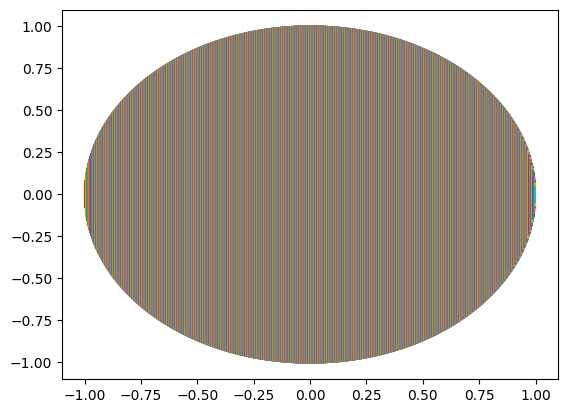

0.9929572014893491


In [4]:
N = 2e3
xarr = np.linspace(-1, 1, int(N+1))
dx = 1./N
dy = 1./N
I_tilde = 0

limarr = []

for x in xarr:
    y_lim = abs(math.sqrt(1 - x**2))
    limarr.append(y_lim)
    I_tilde += dx*approx_reimann_sum_2D(sigma, -y_lim, y_lim, x, dy)

plt.show()
print(I_tilde)


In [5]:
xarr

array([-1.   , -0.999, -0.998, ...,  0.998,  0.999,  1.   ])

In [44]:
limarr[1000:]

[1.0,
 0.999999499999875,
 0.999997999998,
 0.9999954999898749,
 0.9999919999679997,
 0.999987499921874,
 0.9999819998379971,
 0.9999754996998677,
 0.9999679994879836,
 0.9999594991798418,
 0.9999499987499375,
 0.9999394981697642,
 0.9999279974078134,
 0.9999154964295733,
 0.9999019951975293,
 0.9998874936711629,
 0.9998719918069512,
 0.9998554895583661,
 0.9998379868758738,
 0.999819483706934,
 0.999799979995999,
 0.9997794756845131,
 0.9997579707109115,
 0.9997354650106197,
 0.9997119585160518,
 0.9996874511566103,
 0.9996619428586846,
 0.9996354335456502,
 0.9996079231378671,
 0.999579411552679,
 0.9995498987044118,
 0.9995193845043727,
 0.9994878688608482,
 0.9994553516791033,
 0.9994218328613799,
 0.9993873123068954,
 0.9993517899118408,
 0.9993152655693798,
 0.9992777391696465,
 0.9992392105997442,
 0.9991996797437437,
 0.9991591464826812,
 0.9991176106945568,
 0.9990750722543327,
 0.9990315310339308,
 0.9989869869022319,
 0.9989414397250722,
 0.9988948893652425,
 0.9988473356824

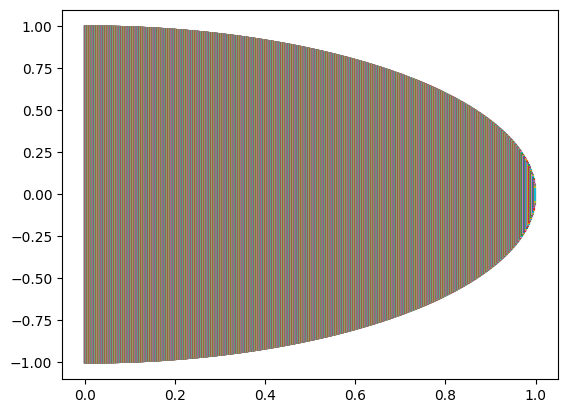

0.9933371552031075


In [6]:
N = 2e3
xarr = np.linspace(0, 1, int(N+1))
dx = 1./N
dy = 1./N
I_tilde = 0

for x in xarr:
    y_lim = abs(math.sqrt(1 - x**2))
    I_tilde += dx*approx_reimann_sum_2D(sigma, -y_lim, y_lim, x, dy)

plt.show()
print(I_tilde)

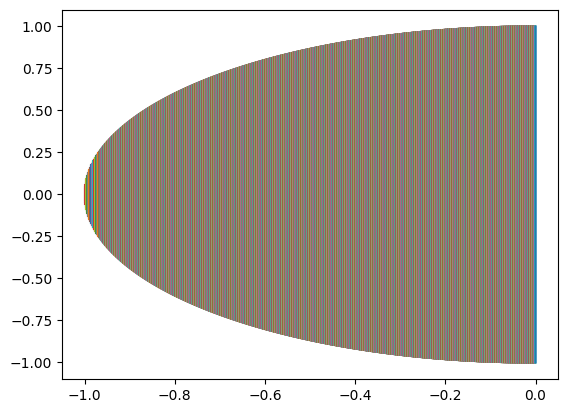

0.993337255160149


In [7]:
N = 2e3
xarr = np.linspace(-1, 0, int(N+1))
dx = 1./N
dy = 1./N
I_tilde = 0

limarr = []

for x in xarr:
    y_lim = abs(math.sqrt(1 - x**2))
    limarr.append(y_lim)
    I_tilde += dx*approx_reimann_sum_2D(sigma, -y_lim, y_lim, x, dy)

plt.show()
print(I_tilde)

In [34]:
2*I_tilde

1.9874737554398187

1.494016022439541

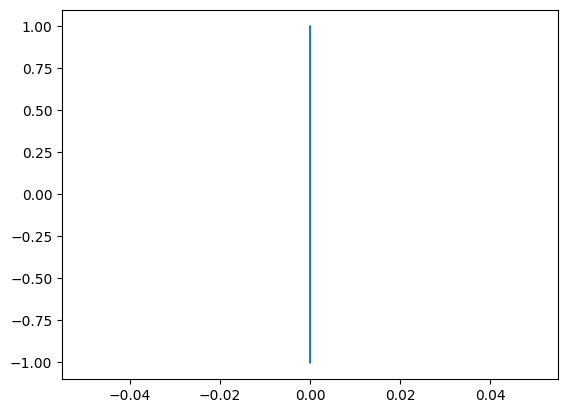

In [29]:
approx_reimann_sum_2D(sigma, -1, 1, 0, 1e-3)

In [12]:
def simpson(farr,Dx):
    l = np.size(farr)
    it = 0.0
    for i in range(0,l-2,2):
        it += (Dx/3.0)*(farr[i]+4*farr[i+1]+farr[i+2])
    return it

In [13]:
N=80

def func(x,y):
    return np.exp(-x**2-y**2)
    
garr = np.zeros(N+1)
farr = np.zeros(N+1)
xarr = np.linspace(-1,1,N+1)

for i in range (0,N+1):
    if (i==0 or i==N):
        garr[i]=0
    else:
        xval = xarr[i]
        ymin = -np.sqrt(1-xval**2)
        ymax = -ymin
        yarr = np.linspace(ymin,ymax,N+1)
        for j in range (0,N+1):
            yval = yarr[j]
            farr[j]=func(xval,yval)
        garr[i]=simpson(farr,(ymax-ymin)/N)
        
integral = simpson(garr,2.0/N)

print(integral)

1.9852006182527568
